## Problem Statement - Part I
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

- The company wants to know:

1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

#### Business Goal 

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


#### Importing Required Libraries

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [256]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

%matplotlib inline

### 1. Reading and Describingthe Data

In [257]:
# Reading the dataset
house_df = pd.read_csv("C:/Users/biswa/OneDrive/UPGRAD/Assignment_AdvancedRegression/train.csv")
house_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [258]:
# Find the Dimenstion of dataset
print(house_df.shape)

# Find the info about dataset
print(house_df.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [259]:
# Checking null values 
house_df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

There are some null values in the dataset

In [260]:
# describing the statistical Summary of the DS
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 2. Data Cleaning

In [261]:
# Checking entire row and column Null values if any
# Row
print("Entire Row Null values -")
house_df.isnull().all(axis=1).sum()

Entire Row Null values -


0

In [262]:
# Column
print("Entire Column Null values -")
house_df.isnull().all(axis=0).sum()

Entire Column Null values -


0

there is no entire-row or entire-column null values.


#### Checking for the null values having count > 0 for each column 

In [263]:
house_df.isnull().sum()[ (house_df.isnull().sum() > 0) ]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Null value percentages which are greater than 0

In [264]:
round(100 * house_df.isnull().sum()[ 
    (house_df.isnull().sum() > 0 )] / len(house_df), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [265]:
for column in house_df.columns:
    print(column+" "+str(house_df[column].isnull().sum()))

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

In [266]:
# checking which columns are having more than 70% null Values
for column in house_df.columns:
    if round(100 * (house_df[column].isnull().sum() / len(house_df[column].index)), 2) > 70:
        print(column +" " + str(round(100 * (house_df[column].isnull().sum() / len(house_df[column].index)), 2)))

Alley 93.77
PoolQC 99.52
Fence 80.75
MiscFeature 96.3


### 3. Data Preparation

#### Removing NULL values

In [267]:
# Eliminating the Columns having more than 70% NULL values
house_df = house_df.drop(house_df.loc[:,list(round(100 * (house_df.isnull().sum()/len(house_df.index)),2) > 70)].columns,1)

In [268]:
# Now checking which columns are having how much % of Null values
for column in house_df.columns:
    #if round(100 * (house_df[column].isnull().sum() / len(house_df[column].index)), 2) > 70:  
        print(column +" " + str(round(100 * (house_df[column].isnull().sum() / len(house_df[column].index)), 2)))

Id 0.0
MSSubClass 0.0
MSZoning 0.0
LotFrontage 17.74
LotArea 0.0
Street 0.0
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.55
MasVnrArea 0.55
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 2.53
BsmtCond 2.53
BsmtExposure 2.6
BsmtFinType1 2.53
BsmtFinSF1 0.0
BsmtFinType2 2.6
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.07
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
KitchenQual 0.0
TotRmsAbvGrd 0.0
Functional 0.0
Fireplaces 0.0
FireplaceQu 47.26
GarageType 5.55
GarageYrBlt 5.55
GarageFinish 5.55
GarageCars 0.0
GarageArea 0.0
GarageQual 5.55
GarageCond 5.55
PavedDrive 0.0
WoodDeckSF 0.0
OpenPorch

#### Observation :

`FireplaceQu` has highest % of Null values i.e. `47.26%`. So we can go through some of the columns having highest Null values as per their %. 

#### 1. FireplaceQu

In [269]:
# Starting from the columns having highest % of NULL values
house_df["FireplaceQu"].describe()  #To describe the statistical summary of the column

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

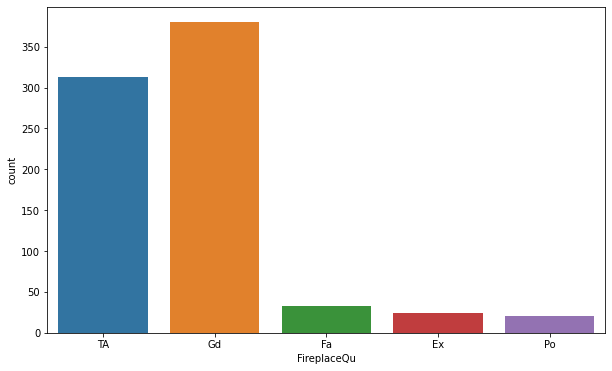

In [270]:
# plotting the column detail
plt.figure(figsize=(10,6))
sns.countplot(house_df["FireplaceQu"])

Here, `Good(Gd)` and `Average(TA)` are the top values but to decide on either of the values would be difficult. Hence we have to add another class or category as `"unknown"` and replace with `"Unknown"`.

In [271]:
#Check the values for FireplaceQu
print(house_df["FireplaceQu"].to_string())


0       NaN
1        TA
2        TA
3        Gd
4        TA
5       NaN
6        Gd
7        TA
8        TA
9        TA
10      NaN
11       Gd
12      NaN
13       Gd
14       Fa
15      NaN
16       TA
17      NaN
18      NaN
19      NaN
20       Gd
21       Gd
22       Gd
23       TA
24       TA
25       Gd
26      NaN
27       Gd
28       Gd
29      NaN
30      NaN
31      NaN
32      NaN
33       Gd
34       Gd
35       Gd
36      NaN
37       TA
38      NaN
39      NaN
40       TA
41       Gd
42      NaN
43      NaN
44      NaN
45       Gd
46       Ex
47      NaN
48      NaN
49      NaN
50      NaN
51       Gd
52      NaN
53       Gd
54       TA
55       Gd
56      NaN
57      NaN
58       Gd
59      NaN
60      NaN
61      NaN
62       Gd
63      NaN
64      NaN
65       Gd
66       Gd
67      NaN
68      NaN
69       TA
70       Gd
71      NaN
72       TA
73      NaN
74      NaN
75      NaN
76      NaN
77      NaN
78      NaN
79      NaN
80       Gd
81      NaN
82       Gd
83  

In [272]:
# Replacing with "Unknown"
house_df["FireplaceQu"]= house_df["FireplaceQu"].fillna("Unknown")

In [273]:
#Check the values for FireplaceQu after changing to unknown
print(house_df["FireplaceQu"].to_string())

0       Unknown
1            TA
2            TA
3            Gd
4            TA
5       Unknown
6            Gd
7            TA
8            TA
9            TA
10      Unknown
11           Gd
12      Unknown
13           Gd
14           Fa
15      Unknown
16           TA
17      Unknown
18      Unknown
19      Unknown
20           Gd
21           Gd
22           Gd
23           TA
24           TA
25           Gd
26      Unknown
27           Gd
28           Gd
29      Unknown
30      Unknown
31      Unknown
32      Unknown
33           Gd
34           Gd
35           Gd
36      Unknown
37           TA
38      Unknown
39      Unknown
40           TA
41           Gd
42      Unknown
43      Unknown
44      Unknown
45           Gd
46           Ex
47      Unknown
48      Unknown
49      Unknown
50      Unknown
51           Gd
52      Unknown
53           Gd
54           TA
55           Gd
56      Unknown
57      Unknown
58           Gd
59      Unknown
60      Unknown
61      Unknown
62      

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

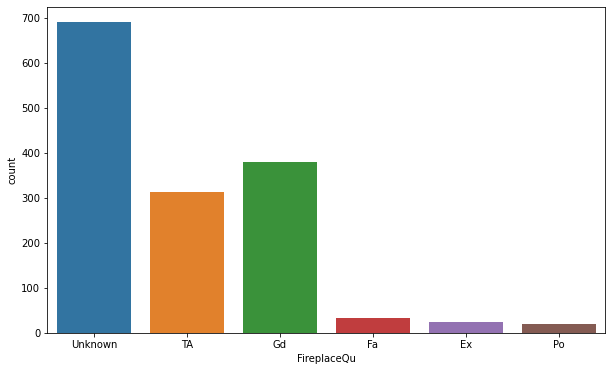

In [274]:
#plotting the FireplaceQu column again to see the changes
plt.figure(figsize=(10,6))
sns.countplot(house_df["FireplaceQu"])

We have 'LotFrontage' column has '17.74%'' of NULL values
#### 2. LotFrontage 

In [275]:
#describe the statistical summary of the column
house_df["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [276]:
#describing the statistical summary of the column
print(house_df["LotFrontage"].to_string())

#print(house_df["FireplaceQu"].to_string())

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
30       50.0
31        NaN
32       85.0
33       70.0
34       60.0
35      108.0
36      112.0
37       74.0
38       68.0
39       65.0
40       84.0
41      115.0
42        NaN
43        NaN
44       70.0
45       61.0
46       48.0
47       84.0
48       33.0
49       66.0
50        NaN
51       52.0
52      110.0
53       68.0
54       60.0
55      100.0
56       24.0
57       89.0
58       66.0
59       60.0
60       63.0
61       60.0
62       44.0
63       50.0
64        NaN
65       76.0
66        NaN
67       72.0
68       47.0
69       81.0
70       95.0
71    

<AxesSubplot:xlabel='LotFrontage'>

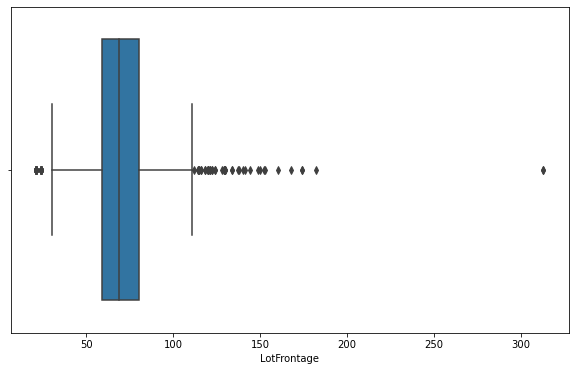

In [277]:
#Now plotting the column
plt.figure(figsize=(10,6))
sns.boxplot(house_df["LotFrontage"])

In [278]:
#checking the mean of the column
house_df["LotFrontage"].mean()

70.04995836802665

In [279]:
# Now filling the NULL values with the above Mean value
house_df["LotFrontage"] = house_df["LotFrontage"].replace(np.NaN, house_df["LotFrontage"].mean())

In [280]:
#Here we have outliers as per the boxplot above, which we need to remove
house_df["LotFrontage"].describe(percentiles = [.05, .25, .5, .75, .90, .95, .99]) #checking the outliers

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
5%         35.950000
25%        60.000000
50%        70.049958
75%        79.000000
90%        92.000000
95%       104.000000
99%       137.410000
max       313.000000
Name: LotFrontage, dtype: float64

In [281]:
# Capping the values to the 95th quantile
percentile_95 = house_df["LotFrontage"].quantile([.05, .95]).values

In [282]:
percentile_95 #Now this is the range of our values

array([ 35.95, 104.  ])

In [283]:
#Assigning all the values below and above the 35.95 and 104.00 respectively, which are Outliers
house_df["LotFrontage"][house_df["LotFrontage"] <= percentile_95[0]]  = percentile_95[0]
house_df["LotFrontage"][house_df["LotFrontage"] >= percentile_95[1]]  = percentile_95[1]

<AxesSubplot:xlabel='LotFrontage'>

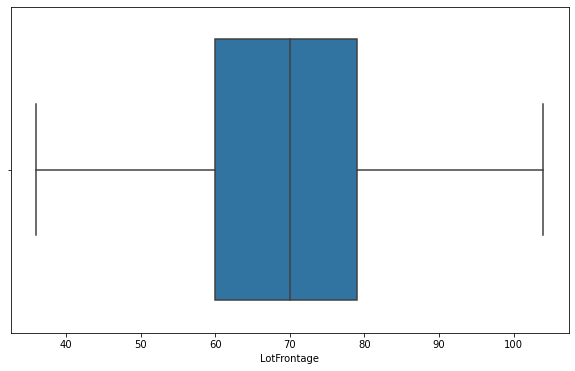

In [284]:
# Now plotting the LotFrontsage column to see the change
plt.figure(figsize=(10,6))
sns.boxplot(house_df["LotFrontage"])

Now we need to check the Columns having NULL value % as `5.55%`.

#### 3. GarageType, GarageFinish, GarageQual, GarageCond

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

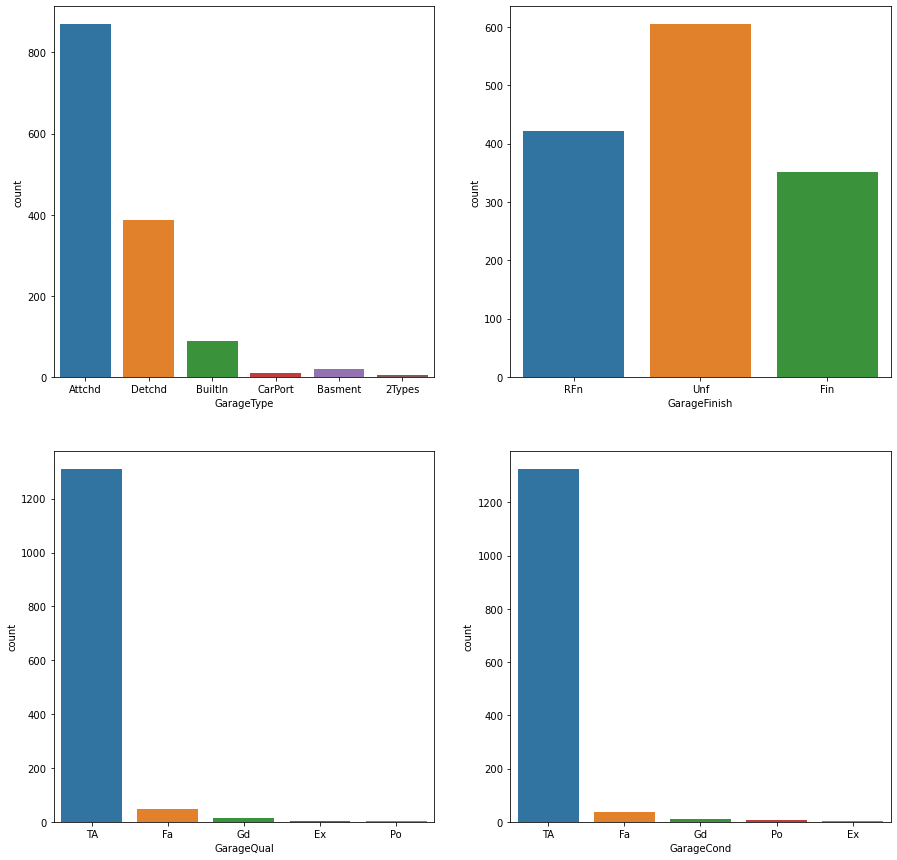

In [285]:
#plotting the 4 above columns
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(house_df["GarageType"])
plt.subplot(2,2,2)
sns.countplot(house_df["GarageFinish"])
plt.subplot(2,2,3)
sns.countplot(house_df["GarageQual"])
plt.subplot(2,2,4)
sns.countplot(house_df["GarageCond"])   

#### Observation:

1. GarageType - Most values are of type "Attchd" i.e. "Attached to home", so we replace NULL values with "Attchd" 
2. GarageFinish - Most values are of type "Unf" i.e. "Unfinished", so we replace NULL values with "Unf"
3. GarageQual - Most values are of type "TA" i.e. "Typical/Average", so we replace NULL values with "TA"
4. GarageCond - Most values are of type "TA" i.e. "Typical/Average", so we replace NULL values with "TA"

In [286]:
house_df["GarageType"] = house_df["GarageType"].fillna("Attchd")
house_df["GarageFinish"] = house_df["GarageFinish"].fillna("Unf")
house_df["GarageQual"] = house_df["GarageQual"].fillna("TA")
house_df["GarageCond"] = house_df["GarageCond"].fillna("TA")

In [287]:
house_df["GarageYrBlt"].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

Here we see, mostly the garages were built in the year 2005 as per above count check. So, replacing NULL values with `2005`.

In [288]:
# Replacing Null values with 2005
house_df["GarageYrBlt"] = house_df["GarageYrBlt"].replace(np.NaN,2005)

- Now we will see Columns which are having approx. 2.53% of Null Values(BsmtExposure has 2.6%)

#### 5.  BsmtQual,  BsmtCond,  BsmtExposure,  BsmtFinType1,  BsmtFinType2 

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

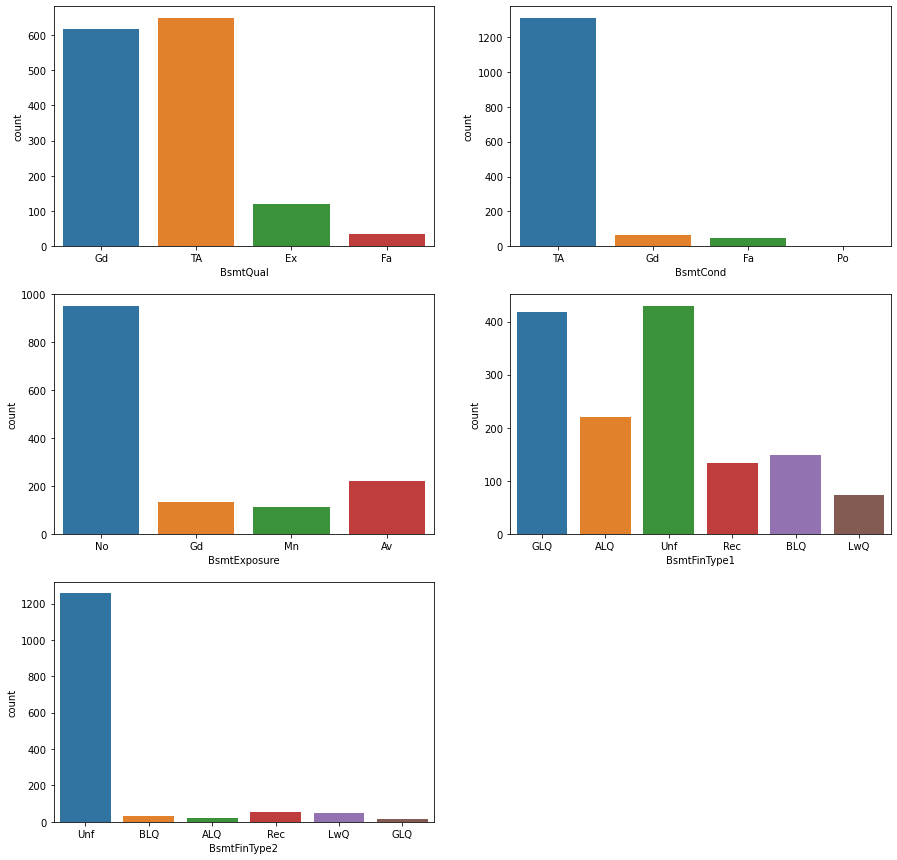

In [289]:
# plotting BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtType2
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.countplot(house_df["BsmtQual"])
plt.subplot(3,2,2)
sns.countplot(house_df["BsmtCond"])
plt.subplot(3,2,3)
sns.countplot(house_df["BsmtExposure"])
plt.subplot(3,2,4)
sns.countplot(house_df["BsmtFinType1"])
plt.subplot(3,2,5)
sns.countplot(house_df["BsmtFinType2"])

#### Observation:

1. BsmtQual - Most values are of type "TA", so we replace NULL values with "TA" 
2. BsmtCond - Most values are of type "TA", so we replace NULL values with "TA"
3. BsmtExposure - Most values are of type "No", so we replace NULL values with "No"
4. BsmtFinType1 - Most values are of type "Unf", so we replace NULL values with "Unf"
5. BsmtFinType2 - Most values are of type "Unf", so we replace NULL values with "Unf"

In [290]:
house_df["BsmtQual"] = house_df["BsmtQual"].fillna("TA")
house_df["BsmtCond"] = house_df["BsmtCond"].fillna("TA")
house_df["BsmtExposure"] = house_df["BsmtExposure"].fillna("No")
house_df["BsmtFinType1"] = house_df["BsmtFinType1"].fillna("Unf")
house_df["BsmtFinType2"] = house_df["BsmtFinType2"].fillna("Unf")

- Then we have columns which are having 0.55% NULL values , i.e. MasVnrType and MasVnrArea

#### 6.  MasVnrType and MasVnrArea

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

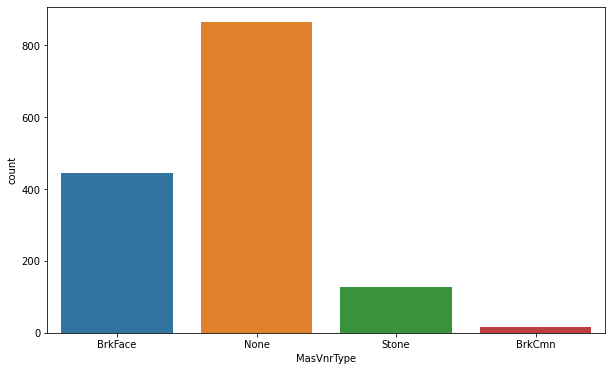

In [291]:
# Now plotting MasVnrType
plt.figure(figsize=(10,6))
sns.countplot(house_df["MasVnrType"])

In [292]:
# In the above plot, most values are of type "None", so we replace NULL values with "None"
house_df["MasVnrType"] = house_df["MasVnrType"].fillna("None")

In [293]:
# checking NULL value counts for MasVnrArea
house_df["MasVnrArea"].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [294]:
# In the above plot, most values are of type "0.0". Hence we replace NULL values with "0.0"
house_df["MasVnrArea"] = house_df["MasVnrArea"].fillna("0.0")

Now we check for Electrical column which has "0.05%" NULL values

#### 7. Electrical 

<AxesSubplot:xlabel='Electrical', ylabel='count'>

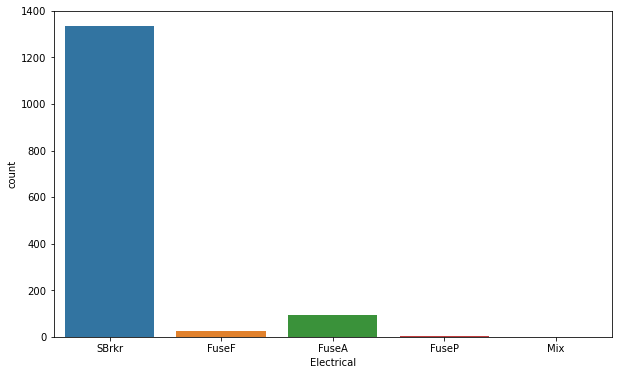

In [295]:
# Plotting the column details with count plot
plt.figure(figsize=(10,6))
sns.countplot(house_df["Electrical"])

In [296]:
# In above plot, most values are of type "SBrkr", hence we replace NULL values with "SBrkr"
house_df["Electrical"] = house_df["Electrical"].fillna("SBrkr")

In [297]:
# Checking NULL values now
for column in house_df.columns:
    print(column+" "+ str(round(100 * (house_df[column].isnull().sum() / len(house_df[column].index)) ,2)))

Id 0.0
MSSubClass 0.0
MSZoning 0.0
LotFrontage 0.0
LotArea 0.0
Street 0.0
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.0
MasVnrArea 0.0
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 0.0
BsmtCond 0.0
BsmtExposure 0.0
BsmtFinType1 0.0
BsmtFinSF1 0.0
BsmtFinType2 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
KitchenQual 0.0
TotRmsAbvGrd 0.0
Functional 0.0
Fireplaces 0.0
FireplaceQu 0.0
GarageType 0.0
GarageYrBlt 0.0
GarageFinish 0.0
GarageCars 0.0
GarageArea 0.0
GarageQual 0.0
GarageCond 0.0
PavedDrive 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
Enclosed

In [298]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<AxesSubplot:>

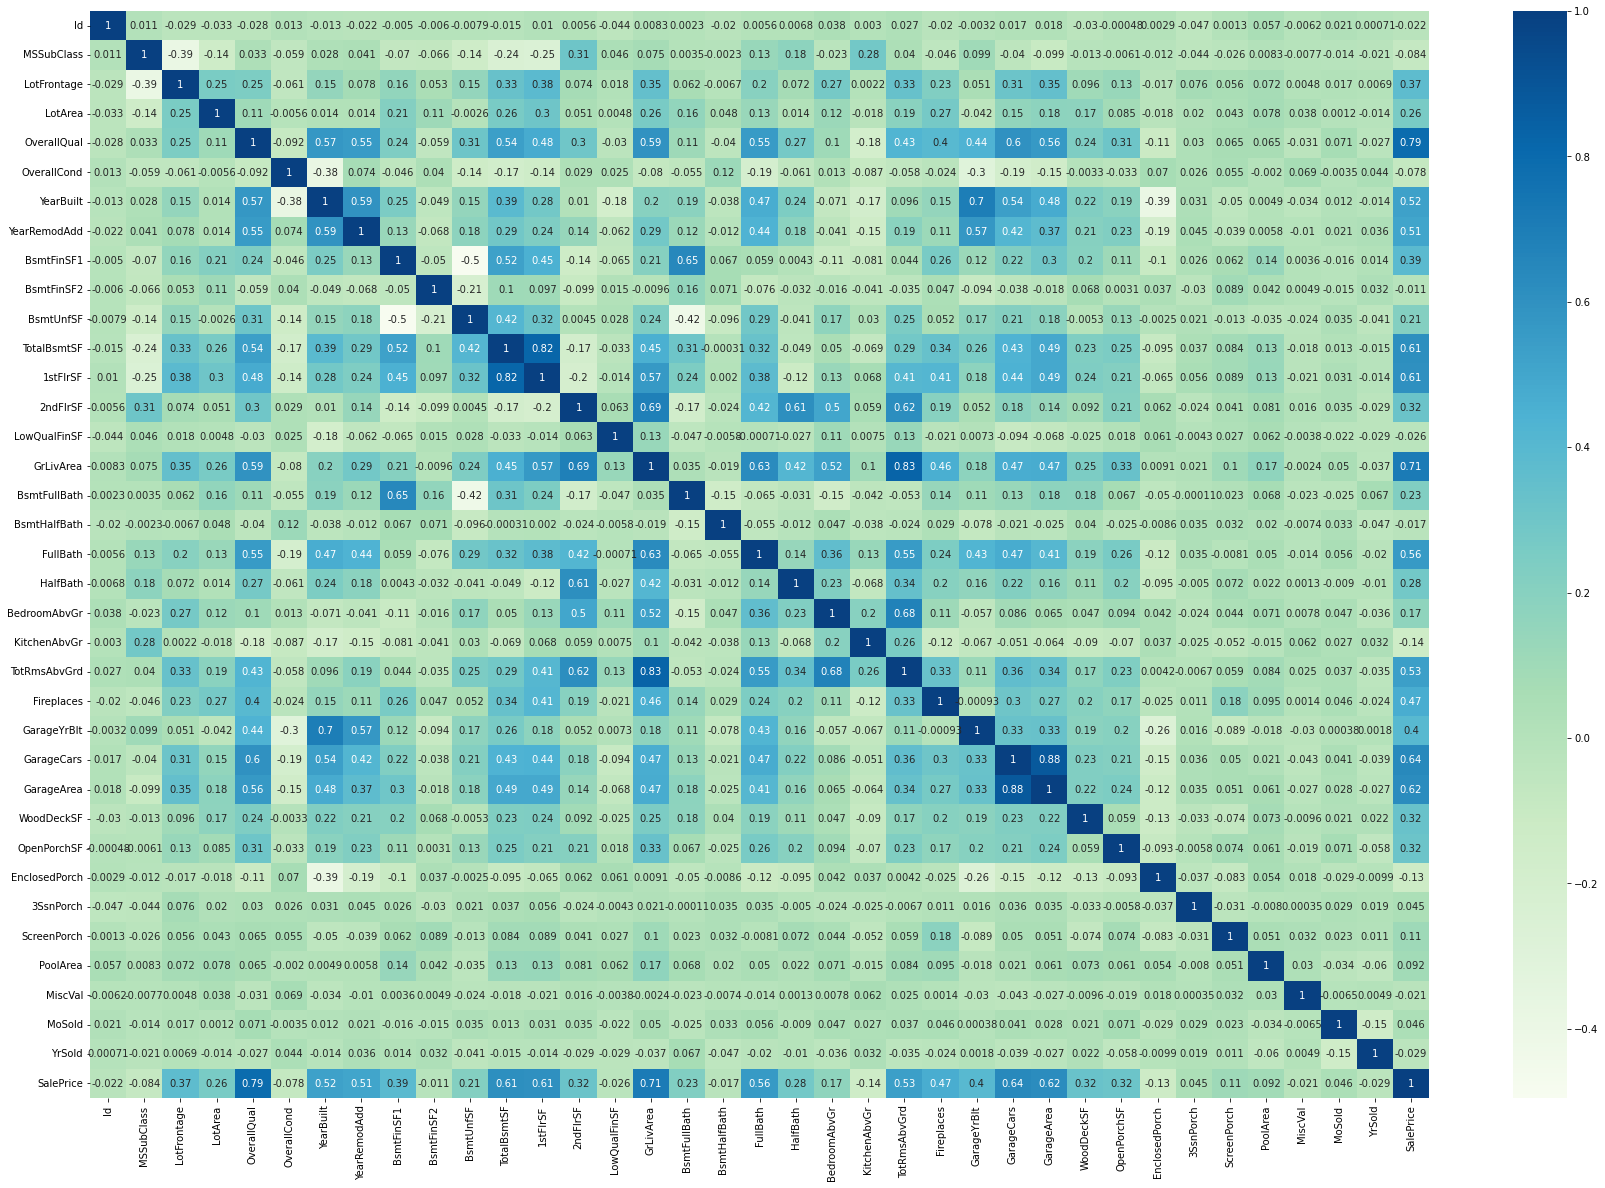

In [299]:
# plotting Heatmap to see the correlations
plt.figure(figsize=(30,20))
house_corr = house_df.corr()
sns.heatmap(house_corr, cmap="GnBu", annot=True)

#### Observations

Corelation of price with independent variables:
- Price is `highly(positively)` corelated with `overall material quality and finish , ground living area, garage size(i.t.o Car capacity), garage area(in sq. ft.), total basement area(in sq. ft), first floor area(sq. ft.), num of bathrooms, total rooms and year built`. Also, there are some features people do consider while purchasing a house.

- Price is `negatively` corelated with `enclosed porch area (sq feet), type of dwelling, overall condition of the house` and some more factors.

Corelation among Independent variables: 
- Some independent variables have high corelation namely `1stfloor area` and `bsmt area`, `garage area` (in terms of sq feet and cars), `total rooms and living area` etc
- Some independent variables have negative corelation namely `unfinished and finished basement area`, `bsmt full bathrooms` and `unfinished bsmt area` etc

* Care needs to be taken while building the model for this data set as multi-colinearity can cause problems.

<AxesSubplot:>

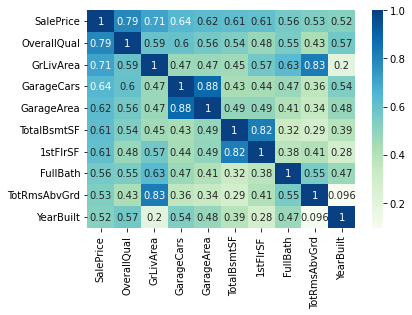

In [300]:
#Those are a lot of variables, so performing EDA would be difficult. So, choosing the top 10 corelated features to the price

#Top 10 heatmap
top_10_cols = house_corr.nlargest(10, 'SalePrice')['SalePrice'].index

top_10_cm = np.corrcoef(house_df[top_10_cols].values.T)
sns.heatmap(top_10_cm, cmap="GnBu", annot=True, yticklabels=top_10_cols.values, xticklabels=top_10_cols.values)

#### Outliers checking

In [301]:
# checking for any outliers

house_numeric_vars_1 = house_df[["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]]
house_numeric_vars_2 = house_df[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]]
house_numeric_vars_3 = house_df[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]]

In [302]:
# print(house_numeric_vars_1.describe(percentiles=[.25,.5,.75,.90,.95,.99]))
# print(house_numeric_vars_2.describe(percentiles=[.25,.5,.75,.90,.95,.99]))
print(house_numeric_vars_3.describe(percentiles=[.25,.5,.75,.90,.95,.99]))

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
95%     335.000000   175.050000     180.150000     0.000000   160.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460

In [303]:
# Capping 
house_numeric_vars_to_cap = house_df[['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']]
type(house_numeric_vars_to_cap)

pandas.core.frame.DataFrame

In [304]:
house_df[column] = house_df[column].astype(float)

In [305]:
# We will cap the values of the columns having outliers to the 95th percentile
for column in house_numeric_vars_to_cap.columns:
    percentile_95 = house_df[column].quantile([.05, .95]).values
    
    house_df[column][house_df[column] <= percentile_95[0]] = percentile_95[0]
    house_df[column][house_df[column] >= percentile_95[1]] = percentile_95[1]

TypeError: '<' not supported between instances of 'float' and 'str'

Changing Yes/No type variable values to 1/0¶

In [ ]:
house_df["CentralAir"] = house_df["CentralAir"].map({'Y' : 1, 'N' : 0})

### 4. Univariate and Bi-variate Analysis of Top 10 Features


#### OverallQual

In [ ]:
# plotting "OverallQual"
plt.figure(figsize=(8,6))
sns.countplot(house_df["OverallQual"])

In [ ]:
# plotting "OverallQual" with "SalePrice"
plt.figure(figsize=(8,6))
sns.boxplot(x="OverallQual", y="SalePrice", data = house_df)

**Observations**

- Most of the houses have Overall quality as 5, 6 and 7
- People pay more for higher quality homes


#### GrLivArea

In [ ]:
# plotting "GrLivArea"
plt.figure(figsize=(8,6))
sns.distplot(house_df["GrLivArea"],bins=20)

<Figure size 576x432 with 0 Axes>

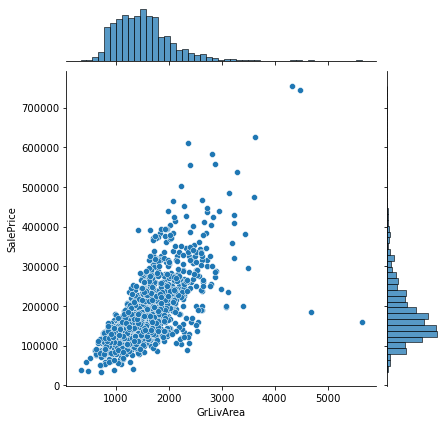

In [306]:
# plotting "GrLivArea" with "SalePrice"
plt.figure(figsize=(8,6))
sns.jointplot(x=house_df["GrLivArea"], y=house_df["SalePrice"])

**Observations**

- Most of the houses have ground living area of roughly 760-780 sq feet and second most being around 1525 sq feet
- There is mostly linear relationship between the living area and price which is expected (with some exceptions)


#### GarageCars

<AxesSubplot:xlabel='GarageCars'>

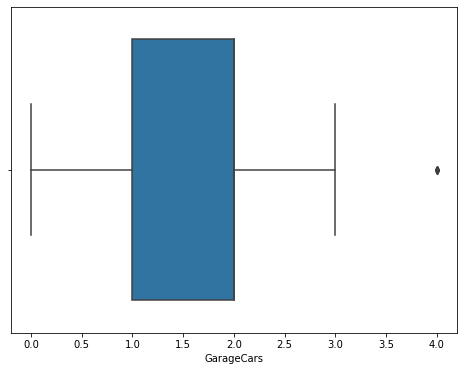

In [307]:
# plotting "GarageCars"
plt.figure(figsize=(8,6))
sns.boxplot(house_df["GarageCars"])

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

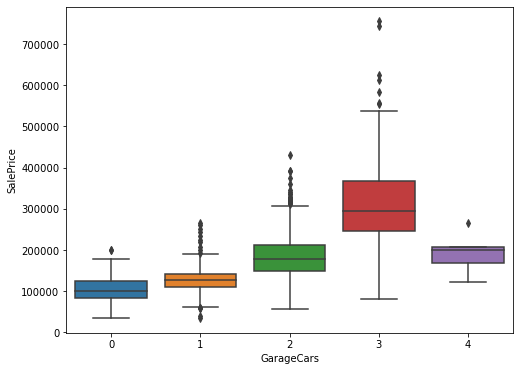

In [308]:
# plotting "GarageCars" with "SalePrice"
plt.figure(figsize=(8,6))
sns.boxplot(x="GarageCars",y="SalePrice",data=house_df)

**Observations**

- Most of the houses have the capacity to store 1-2 cars
- Houses having higher car storage capacity have higher prices


#### GarageArea

<AxesSubplot:xlabel='GarageArea', ylabel='Density'>

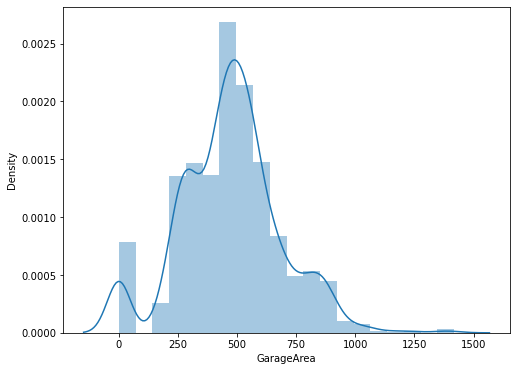

In [309]:
# plotting "GarageArea"
plt.figure(figsize=(8,6))
sns.distplot(house_df["GarageArea"],bins=20)

<Figure size 576x432 with 0 Axes>

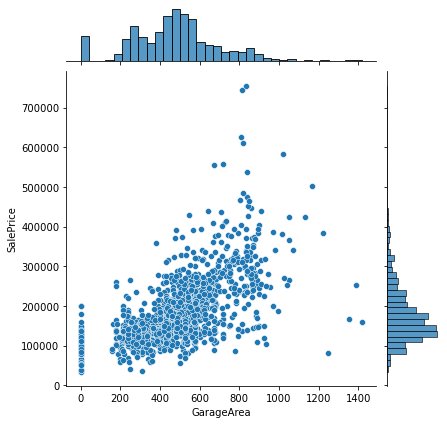

In [310]:
# plotting "GarageArea" with "SalePrice"
plt.figure(figsize=(8,6))
sns.jointplot(x=house_df["GarageArea"],y=house_df["SalePrice"])

**Observations**

- Most of the houses have a garage area of roughly 500 sq feet
- There is mostly a linear relationship between the garage area and price


#### TotalBsmtSF

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

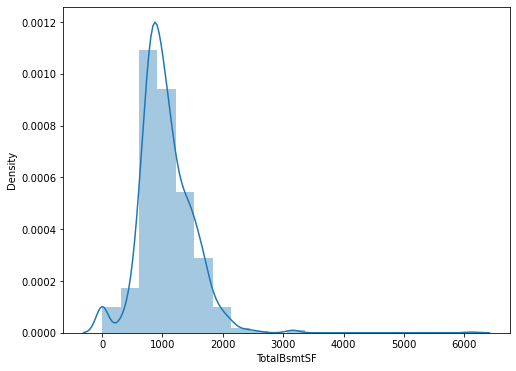

In [311]:
# plotting "TotalBsmtSF"
plt.figure(figsize=(8,6))
sns.distplot(house_df["TotalBsmtSF"],bins=20)

<Figure size 576x432 with 0 Axes>

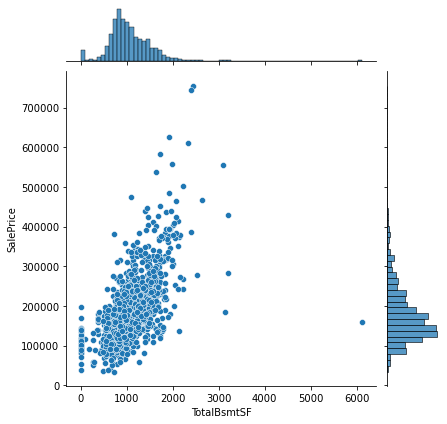

In [312]:
# plotting "TotalBsmtSF" with "SalePrice"
plt.figure(figsize=(8,6))
sns.jointplot(x=house_df["TotalBsmtSF"],y=house_df["SalePrice"])

**Observations**

- Most of the houses have basement area in range 875-1000 sq feet
- There is mostly a linear relationship between the basement area and price with few exceptions



#### 1stFlrSF

<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

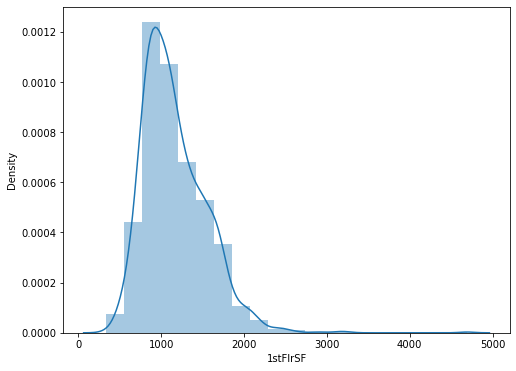

In [313]:
# plotting "1stFlrSF"
plt.figure(figsize=(8,6))
sns.distplot(house_df["1stFlrSF"],bins=20)

<Figure size 576x432 with 0 Axes>

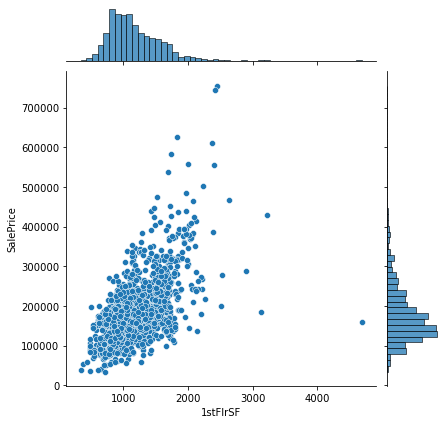

In [314]:
# plotting "1stFlrSF" with "SalePrice"
plt.figure(figsize=(8,6))
sns.jointplot(x=house_df["1stFlrSF"],y=house_df["SalePrice"])

**Observations**

- Most of the houses have 1st floor area in range roughly 875-1000 sq feet
- There is mostly a linear relationship between the 1st floor area and price with few exceptions


#### FullBath

<AxesSubplot:xlabel='FullBath', ylabel='count'>

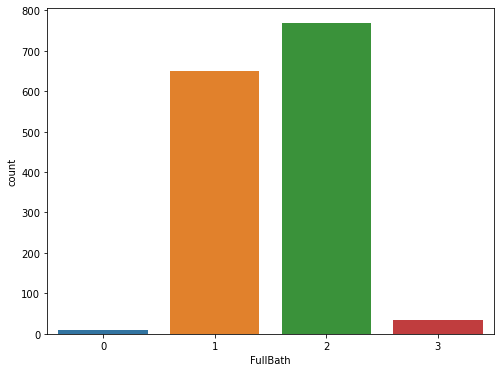

In [315]:
# plotting "FullBath"
plt.figure(figsize=(8,6))
sns.countplot(house_df["FullBath"])

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

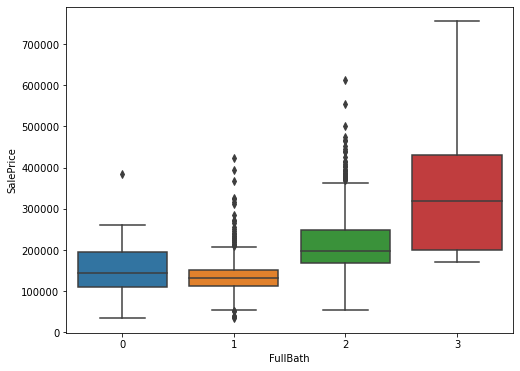

In [316]:
# plotting "FullBath" with "SalePrice"
plt.figure(figsize=(8,6))
sns.boxplot(x="FullBath",y="SalePrice",data=house_df)

**Observations**

- Most of the houses have 2 or 1 bathrooms
- The price increases as the num of bathrooms increase, with few exceptions



#### TotRmsAbvGrd

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='count'>

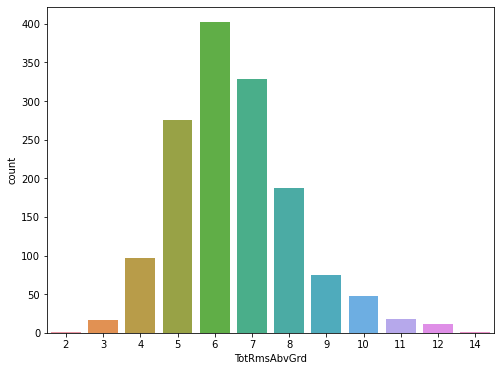

In [317]:
# plotting "TotRmsAbvGrd"
plt.figure(figsize=(8,6))
sns.countplot(house_df["TotRmsAbvGrd"])

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

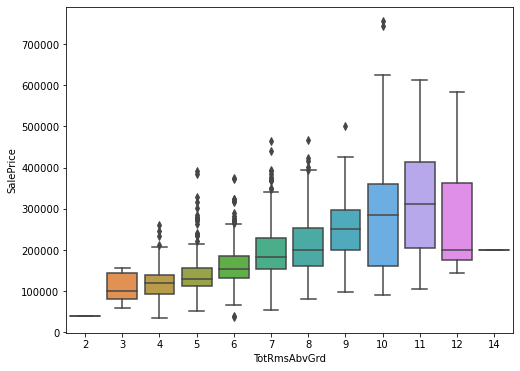

In [318]:
# plotting "TotRmsAbvGrd" with "SalePrice"
plt.figure(figsize=(8,6))
sns.boxplot(x="TotRmsAbvGrd",y="SalePrice",data=house_df)

**Observations**

- Most of the houses have6 or 7 rooms
- The price increases as the number of rooms increase with few exceptions



#### YearBuilt

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

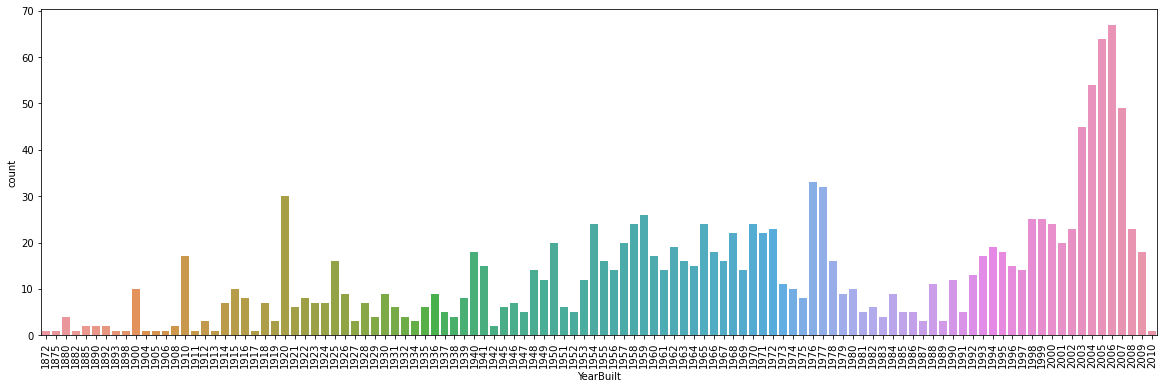

In [319]:
#Plotting "YearBuilt"
plt.figure(figsize=(20,6))
sns.countplot(house_df["YearBuilt"])
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

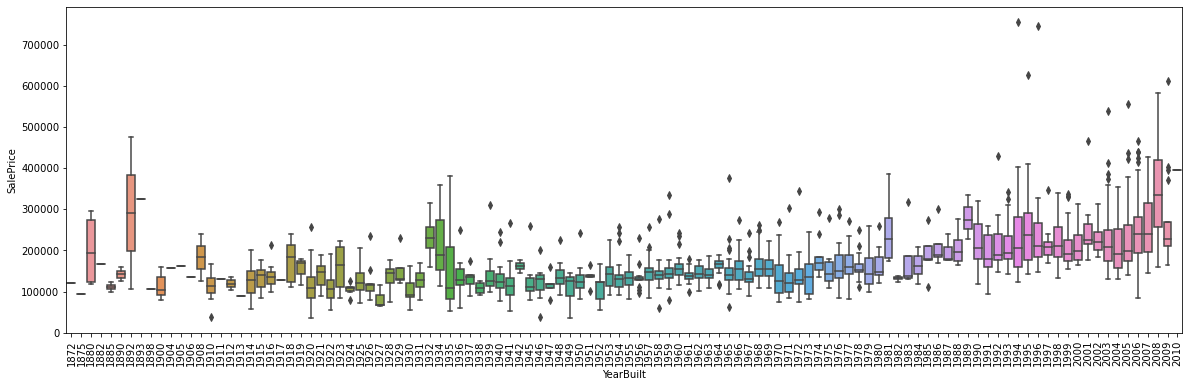

In [320]:
#Plotting "YearBuilt" with "SalePrice"
plt.figure(figsize=(20,6))
sns.boxplot(x="YearBuilt",y="SalePrice",data=house_df)
plt.xticks(rotation=90)

**Observations**

- Most of the houses have been constructed recently
- There is no constant pattern between the price and year. Causes for this can be inflation/depression in the economy in a certain year



### 5. Dummy variable creation

In [321]:
house_categorical_vars_to_dummy = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
                                   'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1','Condition2','BldgType',
                                   'HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st',
                                   'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
                                   'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
                                   'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',
                                   'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

In [322]:
for column in house_categorical_vars_to_dummy:
    #Creation of dummy variables and dropping the first one
    dummy_df = pd.get_dummies(house_df[column], prefix= column, drop_first = True)
    
    #Adding the results to the master dataframe
    house_df = pd.concat([house_df, dummy_df], axis=1)

In [323]:
dummy_df.head()

,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,0
4,0,0,0,1,0


In [324]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
1,2,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,1,0
2,3,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
3,4,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,1,0,0,0,0,0
4,5,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,1,0


In [325]:
#Dropping the original categorical columns 
for column in house_categorical_vars_to_dummy:
    house_df = house_df.drop(column, 1)

In [326]:
house_df.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450.0,2003,2003,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600.0,1976,1976,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250.0,2001,2002,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550.0,1915,1970,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260.0,2000,2000,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [327]:
house_df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=267)

### 6. Feature Standardisation

In [328]:
#initializing 
standard_scaler = StandardScaler()

In [329]:
house_df[["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]] = standard_scaler.fit_transform(house_df[["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]])
house_df[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]] = standard_scaler.fit_transform(house_df[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]])
house_df[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]] = standard_scaler.fit_transform(house_df[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]])

In [330]:
house_df.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,-0.260425,-0.355260,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,...,0,0,0,0,1,0,0,0,1,0
1,2,0.648283,-0.023731,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,...,0,0,0,0,1,0,0,0,1,0
2,3,-0.078684,0.451940,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,...,0,0,0,0,1,0,0,0,1,0
3,4,-0.563328,-0.038146,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,...,0,0,0,0,1,0,0,0,0,0
4,5,0.890605,1.319681,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,...,0,0,0,0,1,0,0,0,1,0


In [331]:
house_df.shape

(1460, 267)

### 7. Model Building


#### Train Test Split

In [332]:
# Independent Variables
X = house_df.drop(['Id', 'SalePrice'], axis=1)

#Dependent Variable
y = house_df['SalePrice']

y.head()

0    0.347273
1    0.007288
2    0.536154
3   -0.515281
4    0.869843
Name: SalePrice, dtype: float64

In [333]:
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.260425,-0.355260,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,...,0,0,0,0,1,0,0,0,1,0
1,0.648283,-0.023731,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,...,0,0,0,0,1,0,0,0,1,0
2,-0.078684,0.451940,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,...,0,0,0,0,1,0,0,0,1,0
3,-0.563328,-0.038146,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,...,0,0,0,0,1,0,0,0,0,0
4,0.890605,1.319681,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,...,0,0,0,0,1,0,0,0,1,0


In [334]:
# Splitting the data into train-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, test_size=0.3, random_state= 100)

In [335]:
X_train.shape

(1021, 265)

In [336]:
X_test.shape

(438, 265)

In [337]:
#adding the constants
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

#### First Training model Linear Regression

In [338]:
logis_reg_model_1 = sm.OLS(y_train, X_train_sm, family = sm.families.Binomial())
#fitting the residuals
res = logis_reg_model_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     64.66
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:17:00   Log-Likelihood:                 138.94
No. Observations:                1021   AIC:                             228.1
Df Residuals:                     768   BIC:                             1475.
Df Model:                         252                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -8.8493      0.699    -12.665      0.000     -10.221      -7.478
LotFrontage               0.0111      0.013      0.835      0.404      -0.015       0.037
LotArea                   0.0498      0.016      3.082      0.002       0.018       0.081
YearBuilt                 0.1650      0.035      4.681      0.000       0.096       0.234
YearRemodAdd              0.0227      0.016      1.452      0.147      -0.008       0.053
MasVnrArea                0.0392      0.013      2.997      0.003       0.014       0.065
BsmtFinSF1                0.1009      0.013      7.615      0.000       0.075       0.127
BsmtFinSF2                0.0263      0.015      1.713      0.087      -0.004       0.057
BsmtUnfSF                -0.0003      0.011     -0.024      0.981      -0.021       0.021
TotalBsmtSF               0.1143      0.016      7.140      0.000       0.083       0.146
1stFlrSF                  0.1093      0.020      5.447      0.000       0.070       0.149
2ndFlrSF                  0.2081      0.023      9.130      0.000       0.163       0.253
LowQualFinSF             -0.0214      0.011     -1.877      0.061      -0.044       0.001
GrLivArea                 0.2513      0.017     14.772      0.000       0.218       0.285
BsmtFullBath              0.0137      0.013      1.034      0.301      -0.012       0.040
BsmtHalfBath             -0.0043      0.010     -0.450      0.653      -0.023       0.015
FullBath                  0.0140      0.016      0.858      0.391      -0.018       0.046
HalfBath                 -0.0513      0.029     -1.767      0.078      -0.108       0.006
BedroomAbvGr             -0.0296      0.016     -1.856      0.064      -0.061       0.002
KitchenAbvGr             -0.0429      0.020     -2.138      0.033      -0.082      -0.004
TotRmsAbvGrd             -0.0115      0.022     -0.531      0.596      -0.054       0.031
Fireplaces                0.0274      0.022      1.245      0.214      -0.016       0.071
GarageYrBlt               0.0180      0.016      1.100      0.272      -0.014       0.050
GarageCars                0.0218      0.023      0.937      0.349      -0.024       0.067
GarageArea                0.0330      0.024      1.399      0.162      -0.013       0.079
WoodDeckSF                0.0057      0.010      0.579      0.563      -0.014       0.025
OpenPorchSF               0.0263      0.010      2.518      0.012       0.006       0.047
EnclosedPorch             0.0072      0.010      0.693      0.488      -0.013       0.028
3SsnPorch                 0.0162      0.008      1.998      0.046       0.000       0.032
ScreenPorch               0.0129      0.010      1.315      0.189      -0.006       0.032
PoolArea                  0.0503      0.013      3.902      0.000       0.025       0.076
MiscVal                

#### Make Predictions

In [339]:
y_train_pred = res.predict(X_train_sm)
y_test_pred = res.predict(X_test_sm)

Text(0.5, 0, 'Errors ')

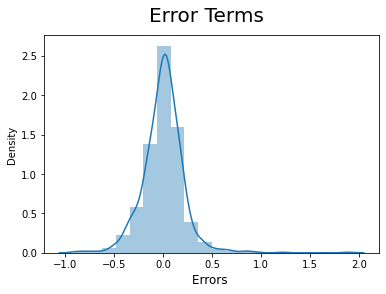

In [340]:
# Calculating Residuals
residual = y_train - y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                          # Plot heading , (suptitle - subplot title)
plt.xlabel('Errors ', fontsize= 12)                                 # X-label

**Observations**

The error terms seem to be normalized and model r2 score is also very good.

Text(0, 0.5, 'y_pred')

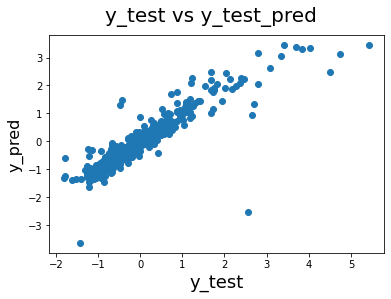

In [341]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

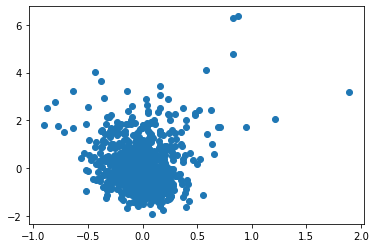

In [342]:
# checking non-linearity in data by plotting residuals vs predictors
plt.scatter(y_train - y_train_pred, y_train_pred)

**Observations**


- The residuals should be scattered randomly around 0 - `No`
- The spread of residuals remains constant - `No`
- There are no extreme points - `No`

In [343]:
metric_linear = []

#Train R2 score
train_r2_linear = r2_score(y_true = y_train, y_pred = y_train_pred)
print("Train r2 = " + str(train_r2_linear))
metric_linear.append(train_r2_linear)

#Test R2 score
test_r2_linear = r2_score(y_true = y_test, y_pred = y_test_pred)
print("Test r2 = " + str(test_r2_linear))
metric_linear.append(test_r2_linear)



# Train RSS(Residual Sum of Squares)
train_rss_linear = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_linear))
metric_linear.append(train_rss_linear)
                          
# Test RSS
test_rss_linear = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_linear))
metric_linear.append(test_rss_linear)                          
                         

                         
# Train MSE(Mean Squared Error)
train_mse_linear = mean_squared_error(y_train, y_train_pred)
print("Train MSE =" + str(train_mse_linear))
                         
#Test MSE
test_mse_linear = mean_squared_error(y_test, y_test_pred)
print("Test MSE ="+ str(test_mse_linear))
                         

                         
# Train RMSE(Root Mean Squared Error)
train_rmse_linear = train_mse_linear ** 0.5
print("Train RMSE ="+ str(train_rmse_linear))
metric_linear.append(train_rmse_linear)
                         
# Test RMSE
test_rmse_linear = test_mse_linear ** 0.5
print("Test RMSE ="+ str(test_rmse_linear))
metric_linear.append(test_rmse_linear)

Train r2 = 0.9549914229163747
Test r2 = 0.8123048296452976
Train RSS = 45.536039440230155
Test RSS = 83.88718305764098
Train MSE =0.04459945096986303
Test MSE =0.1915232489900479
Train RMSE =0.21118582094890515
Test RMSE =0.4376336927043528


In [344]:
len(X_train.columns)

265

### 8. Ridge Regression

In [345]:
# List of Alphas to tune - if value too high it will lead to "Overfitting", if it is too low  it will not be able to
# handle overfitting
# defining the Parameters
params = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                    7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}


#Initialising
ridge = Ridge()

#cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       n_jobs = 60,
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
#fitting the training model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=60,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [346]:
# Printing the better Hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [347]:
# fitting Ridge model for alpha = 8 and printing coefficients which have been penalised
alpha = 8
ridge = Ridge(alpha=alpha)

ridge_model = ridge.fit(X_train, y_train)
print("Ridge Coefficients :", ridge.coef_)

Ridge Coefficients : [ 2.04705955e-02  7.36554100e-02  1.02080590e-01  4.04110450e-02
  3.75011277e-02 -6.82242681e-03  1.42425723e-02  1.38575152e-02
  1.21017077e-02  6.44317842e-02  1.98321570e-01 -1.57440568e-02
  2.10694864e-01  6.00670266e-02  1.26658149e-02  5.97372526e-02
  1.23961498e-02 -2.15450868e-02 -5.94649063e-02  1.95325499e-02
  3.75727378e-02  1.20157886e-02  1.18829172e-01 -4.45550386e-02
  2.24211385e-02 -7.73179696e-03  9.07614980e-03  1.49665904e-02
  2.01682580e-02 -1.44381515e-02  1.86644748e-03 -3.74858469e-03
 -1.00739479e-02 -3.48599450e-02  2.46067885e-03  5.45903832e-02
 -1.21331032e-02 -9.38949408e-02  3.79866187e-02 -1.87157851e-02
 -6.43490143e-03 -1.26978758e-03 -1.55580172e-02 -7.40102078e-02
 -7.82439034e-02 -3.27724513e-02 -4.64611839e-02  6.86914081e-02
  7.09730182e-02  6.74762808e-02  4.76007703e-02  3.22223737e-02
  3.34563851e-02 -1.39933767e-01  2.04029372e-02  1.26637994e-01
  1.24043942e-01  1.71319688e-01 -4.43846616e-02  1.22744476e-01
 -9.

#### Make Ridge Predictions

In [348]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

metric_ridge = []

#Train R2 score
train_r2_ridge = r2_score(y_true = y_train, y_pred = y_train_pred)
print("Train r2 = " + str(train_r2_ridge))
metric_ridge.append(train_r2_ridge)

#Test R2 score
test_r2_ridge = r2_score(y_true = y_test, y_pred = y_test_pred)
print("Test r2 = " + str(test_r2_ridge))
metric_ridge.append(test_r2_ridge)



# Train RSS(Residual Sum of Squares)
train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
metric_ridge.append(train_rss_ridge)
                          
# Test RSS
test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
metric_ridge.append(test_rss_ridge)                          
                         

                         
# Train MSE(Mean Squared Error)
train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE =" + str(train_mse_ridge))
                         
#Test MSE
test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE ="+ str(test_mse_ridge))
                         

                         
# Train RMSE(Root Mean Squared Error)
train_rmse_ridge = train_mse_linear ** 0.5
print("Train RMSE ="+ str(train_rmse_ridge))
metric_ridge.append(train_rmse_ridge)
                         
# Test RMSE
test_rmse_ridge = test_mse_linear ** 0.5
print("Test RMSE ="+ str(test_rmse_ridge))
metric_ridge.append(test_rmse_ridge)

Train r2 = 0.9005019956002688
Test r2 = 0.8686881176963328
Train RSS = 100.66403663800111
Test RSS = 58.687625726514426
Train MSE =0.09859357163369355
Test MSE =0.13399001307423386
Train RMSE =0.21118582094890515
Test RMSE =0.4376336927043528


### 9. Lasso Regression

In [349]:
#Initialising
lasso = Lasso()

#cross validation
model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       n_jobs = 60,
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
#fitting the training model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=60,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [350]:
# Printing the best Hyperparameter value "alpha"
print(model_cv.best_params_)

{'alpha': 0.0001}


In [351]:
# fitting the Lasso model for alpha = 0.001 and printing coefficients which have been penalised
alpha = 0.001

lasso = Lasso(alpha = alpha)

lasso_model = lasso.fit(X_train, y_train)

In [352]:
#printing the coefficients now
lasso.coef_

array([ 1.75569069e-02,  7.42873531e-02,  1.12698383e-01,  4.13733854e-02,
        2.61165613e-02, -0.00000000e+00,  6.20488030e-03,  1.09935898e-02,
        8.76407360e-03,  0.00000000e+00,  1.01758136e-01, -2.42423067e-02,
        3.22756005e-01,  5.89652217e-02,  1.13850078e-02,  5.22049659e-02,
        0.00000000e+00, -1.85875381e-02, -6.45310030e-02,  3.35842066e-03,
        1.47170759e-02,  6.66679918e-03,  1.13883411e-01, -4.66057641e-02,
        1.44150278e-02, -1.19908110e-03,  9.26428611e-03,  1.30917138e-02,
        2.05135995e-02, -2.84173414e-02, -7.59249705e-04, -3.84058819e-03,
       -6.60133984e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.64627628e-02, -7.19277962e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -1.52902600e-03, -0.00000000e+00, -5.66656237e-03,  0.00000000e+00,
        0.00000000e+00,  1.87295442e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

#### Predict using Lasso

In [353]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

metric_lasso = []

#Train R2 score
train_r2_lasso = r2_score(y_true = y_train, y_pred = y_train_pred)
print("Train r2 = " + str(train_r2_lasso))
metric_lasso.append(train_r2_lasso)

#Test R2 score
test_r2_lasso = r2_score(y_true = y_test, y_pred = y_test_pred)
print("Test r2 = " + str(test_r2_lasso))
metric_lasso.append(test_r2_lasso)



# Train RSS(Residual Sum of Squares)
train_rss_lasso = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_lasso))
metric_lasso.append(train_rss_lasso)
                          
# Test RSS
test_rss_lasso = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_lasso))
metric_lasso.append(test_rss_lasso)                          
                         

                         
# Train MSE(Mean Squared Error)
train_mse_lasso = mean_squared_error(y_train, y_train_pred)
print("Train MSE =" + str(train_mse_lasso))
                         
#Test MSE
test_mse_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE ="+ str(test_mse_lasso))
                         

                         
# Train RMSE(Root Mean Squared Error)
train_rmse_lasso = train_mse_linear ** 0.5
print("Train RMSE ="+ str(train_rmse_lasso))
metric_lasso.append(train_rmse_lasso)
                         
# Test RMSE
test_rmse_lasso = test_mse_linear ** 0.5
print("Test RMSE ="+ str(test_rmse_lasso))
metric_lasso.append(test_rmse_lasso)

Train r2 = 0.9129603501709519
Test r2 = 0.8542551168477192
Train RSS = 88.05968071630743
Test RSS = 65.13821143935243
Train MSE =0.08624846299344507
Test MSE =0.14871737771541652
Train RMSE =0.21118582094890515
Test RMSE =0.4376336927043528


## Subjective Questions 

1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Answer:
- Optimal Value of Alpha in Ridge  = 8
- Optimal Value of Alpha in Lasso  = 0.001

Create a model where we `Double` the alphas for both ridge and lasso, and check the new model

In [354]:
# doubling the alphas of ridge and lasso. Which will become, for ridge, 16 and for lasso, 0.002
ridge_alpha_double = 16
lasso_alpha_double = 0.002

# Ridge Regression model
ridge_double = Ridge(alpha = ridge_alpha_double)
ridge_double_model = ridge_double.fit(X_train, y_train)

#Lasso Regression model
lasso_double = Lasso(alpha = lasso_alpha_double)
lasso_double_model = lasso_double.fit(X_train, y_train)

In [355]:
# Making Predictions using Ridge

y_train_pred = ridge_double.predict(X_train)
y_test_pred = ridge_double.predict(X_test)

metric_ridge_double = []

#Train R2 score
train_r2_ridge = r2_score(y_true = y_train, y_pred = y_train_pred)
print("Train r2 = " + str(train_r2_ridge))
metric_ridge_double.append(train_r2_ridge)

#Test R2 score
test_r2_ridge = r2_score(y_true = y_test, y_pred = y_test_pred)
print("Test r2 = " + str(test_r2_ridge))
metric_ridge_double.append(test_r2_ridge)



# Train RSS(Residual Sum of Squares)
train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
metric_ridge_double.append(train_rss_ridge)
                          
# Test RSS
test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
metric_ridge_double.append(test_rss_ridge)                          
                         

                         
# Train MSE(Mean Squared Error)
train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE =" + str(train_mse_ridge))
                         
#Test MSE
test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE ="+ str(test_mse_ridge))
                         

                         
# Train RMSE(Root Mean Squared Error)
train_rmse_ridge = train_mse_linear ** 0.5
print("Train RMSE ="+ str(train_rmse_ridge))
metric_ridge_double.append(train_rmse_ridge)
                         
# Test RMSE
test_rmse_ridge = test_mse_linear ** 0.5
print("Test RMSE ="+ str(test_rmse_ridge))
metric_ridge_double.append(test_rmse_ridge)

Train r2 = 0.8910454574275779
Test r2 = 0.866464914094645
Train RSS = 110.23139741902781
Test RSS = 59.68124898893909
Train MSE =0.10796415026349443
Test MSE =0.13625855933547737
Train RMSE =0.21118582094890515
Test RMSE =0.4376336927043528


In [356]:
# Making Predictions using Lasso

y_train_pred = lasso_double.predict(X_train)
y_test_pred = lasso_double.predict(X_test)

metric_lasso_double = []

#Train R2 score
train_r2_lasso = r2_score(y_true = y_train, y_pred = y_train_pred)
print("Train r2 = " + str(train_r2_lasso))
metric_lasso_double.append(train_r2_lasso)

#Test R2 score
test_r2_lasso = r2_score(y_true = y_test, y_pred = y_test_pred)
print("Test r2 = " + str(test_r2_lasso))
metric_lasso_double.append(test_r2_lasso)



# Train RSS(Residual Sum of Squares)
train_rss_lasso = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_lasso))
metric_lasso_double.append(train_rss_lasso)
                          
# Test RSS
test_rss_lasso = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_lasso))
metric_lasso_double.append(test_rss_lasso)                          
                         

                         
# Train MSE(Mean Squared Error)
train_mse_lasso = mean_squared_error(y_train, y_train_pred)
print("Train MSE =" + str(train_mse_lasso))
                         
#Test MSE
test_mse_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE ="+ str(test_mse_lasso))
                         

                         
# Train RMSE(Root Mean Squared Error)
train_rmse_lasso = train_mse_linear ** 0.5
print("Train RMSE ="+ str(train_rmse_lasso))
metric_lasso_double.append(train_rmse_lasso)
                         
# Test RMSE
test_rmse_lasso = test_mse_linear ** 0.5
print("Test RMSE ="+ str(test_rmse_lasso))
metric_lasso_double.append(test_rmse_lasso)

Train r2 = 0.8996065629448985
Test r2 = 0.8607972100421853
Train RSS = 101.5699630047745
Test RSS = 62.214333492214934
Train MSE =0.09948086484307002
Test MSE =0.14204185728816196
Train RMSE =0.21118582094890515
Test RMSE =0.4376336927043528


In [357]:
# Creating a table which contain all the metrics

lr_table = {'Metric' :['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)' ],
           'Linear Regression': metric_linear
           }

lr_metric = pd.DataFrame(lr_table, columns = ['Metric','Linear Regression'])

rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')
rg_metric_double = pd.Series(metric_ridge_double, name = 'Ridge Regression Double' )
ls_metric_double = pd.Series(metric_lasso_double, name = 'Lasso Regression Double')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric, rg_metric_double, ls_metric_double], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Ridge Regression Double,Lasso Regression Double
0,R2 Score (Train),0.954991,0.900502,0.912960,0.891045,0.899607
1,R2 Score (Test),0.812305,0.868688,0.854255,0.866465,0.860797
2,RSS (Train),45.536039,100.664037,88.059681,110.231397,101.569963
3,RSS (Test),83.887183,58.687626,65.138211,59.681249,62.214333
4,MSE (Train),0.211186,0.211186,0.211186,0.211186,0.211186
5,MSE (Test),0.437634,0.437634,0.437634,0.437634,0.437634


In [358]:
print(max(ridge_double_model.coef_))
print(max(lasso_double_model.coef_))

0.3064437050577512
0.9681188768660993


#### Finding the most important predictor before and after doubling alpha

In [359]:
ridge_max_col = ""
ridge_max_coef = 0
ridge_double_max_col = ""
ridge_double_max_coef = 0

lasso_max_col = ""
lasso_max_coef = 0
lasso_double_max_col = ""
lasso_double_max_coef = 0

# Calculating max coeff and most imp column of Ridge Model
for (coef,column) in zip(ridge_model.coef_, X_train.columns):
    if coef > ridge_max_coef:
        ridge_max_coef = coef
        ridge_max_col = column
# Calculating max coeff and most imp column of Ridge_double Model        
for (coef,column) in zip(ridge_double_model.coef_, X_train.columns):
    if coef > ridge_double_max_coef:
        ridge_double_max_coef = coef
        ridge_double_max_col = column
        
# Calculating max coeff and most imp column of Lasso Model        
for (coef,column) in zip(lasso_model.coef_, X_train.columns):
    if coef > lasso_max_coef:
        lasso_max_coef = coef
        lasso_max_col = column
        
# Calculating max coeff and most imp column of Lasso_double Model        
for (coef,column) in zip(lasso_double_model.coef_, X_train.columns):
    if coef > lasso_double_max_coef:
        lasso_double_max_coef = coef
        lasso_double_max_col = column
        
        
print("Ridge max col =", ridge_max_col)
print("Ridge max coef =", ridge_max_coef)
print()

print("Ridge_double max col =", ridge_double_max_col)
print("Ridge_double max coef =", ridge_double_max_coef)
print()

print("Lasso max col =", lasso_max_col)
print("Lasso max coef =", lasso_max_coef)
print()

print("Lasso_double max col =", lasso_double_max_col)
print("Lasso_double max coef =", lasso_double_max_coef)
print()

Ridge max col = OverallQual_10
Ridge max coef = 0.39249344588274165

Ridge_double max col = OverallQual_9
Ridge_double max coef = 0.3064437050577512

Lasso max col = OverallQual_10
Lasso max coef = 1.0940131240676407

Lasso_double max col = OverallQual_10
Lasso_double max coef = 0.9681188768660993



**Observations**

- The most important predictor was always OveralQual_9 for all the above models.
- It also makes sense, realistically as the overall quality of the house will be the highest contributor to its price

2. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [360]:
# Determining top_5 predictors 
lasso_max_coef_list = []

for(coef, column) in zip(lasso_model.coef_, X_train.columns):
    if coef > lasso_max_coef:
        lasso_max_coef = coef
        lasso_max_col = column
    lasso_max_coef_list.append(coef)
lasso_max_coef_list.sort()

In [361]:
print(lasso_max_coef_list)

[-3.196229134831289, -0.2704978549578457, -0.2244768933005289, -0.20867672280909166, -0.20834144324580486, -0.2056785144301674, -0.1950072940316458, -0.1682197998063631, -0.1425761051419998, -0.14151142065242936, -0.13540173959862453, -0.12784684932253731, -0.12517695141936822, -0.12217964218613732, -0.12073549034354351, -0.1133940672714499, -0.09139867016129258, -0.08576759189068038, -0.08151360056795419, -0.08047653192311212, -0.07726229462063659, -0.07192779620154154, -0.07134307248223909, -0.0645310030297273, -0.06298726750965385, -0.05645385115608995, -0.05353518856289535, -0.051054963119942814, -0.048509962219683254, -0.04660576407852348, -0.04630838894243244, -0.044355660286150456, -0.032719788783003384, -0.029308535440852802, -0.028417341397531437, -0.027982116272615817, -0.026885530885074033, -0.025971791366197358, -0.024242306739538925, -0.023624842695159166, -0.023520793928662645, -0.023325054984676095, -0.02119850689250369, -0.018587538069058766, -0.015547078456030738, -0.0

In [362]:
for (coef, column) in zip(lasso_model.coef_, X_train.columns):
    print("{} {}".format(column, coef))

LotFrontage 0.01755690691666061
LotArea 0.0742873531038661
YearBuilt 0.11269838311465498
YearRemodAdd 0.041373385445027264
MasVnrArea 0.02611656133992115
BsmtFinSF1 -0.0
BsmtFinSF2 0.006204880301449664
BsmtUnfSF 0.010993589826361583
TotalBsmtSF 0.008764073596611638
1stFlrSF 0.0
2ndFlrSF 0.10175813627355466
LowQualFinSF -0.024242306739538925
GrLivArea 0.32275600454264836
BsmtFullBath 0.05896522166862842
BsmtHalfBath 0.011385007817035157
FullBath 0.05220496586973695
HalfBath 0.0
BedroomAbvGr -0.018587538069058766
KitchenAbvGr -0.0645310030297273
TotRmsAbvGrd 0.0033584206586159873
Fireplaces 0.014717075903019584
GarageYrBlt 0.006666799175570306
GarageCars 0.11388341107092242
GarageArea -0.04660576407852348
WoodDeckSF 0.014415027784293164
OpenPorchSF -0.0011990811044837928
EnclosedPorch 0.009264286114589104
3SsnPorch 0.013091713832682974
ScreenPorch 0.020513599460073337
PoolArea -0.028417341397531437
MiscVal -0.0007592497051044463
MoSold -0.003840588190526586
YrSold -0.006601339839627249
M

Determining Top-5 features from above info : 
1. RoofMatl_WdShngl 1.00188133088509
2. OverallQual_9 (0.7766964919635191)
3. Neighborhood_NoRidge (0.4182886990030101)
4. OverallQual_8 (0.37732673696292596)
5. GrLivArea     (0.3216192894787822)

In [369]:
# Drop the above columns from X_train
#X_train_excluding_top_5 = X_train.drop(['OverallQual_8', 'OverallQual_9', 'OverallCond_9', 
#                                         'GrLivArea', 'Neighborhood_Crawfor'], axis =1)

X_train_excluding_top_5 = X_train.drop(['RoofMatl_WdShngl', 'OverallQual_9', 'Neighborhood_NoRidge', 
                                         'OverallQual_8', 'GrLivArea'], axis =1)

# Lasso Regression model
lasso_excluding_top_5 = Lasso(alpha = 0.001)
lasso_excluding_top_5_model = lasso_excluding_top_5.fit(X_train_excluding_top_5, y_train)

In [364]:
# Determining top 5 Predictors
lasso_max_coef_excluding_top_5_list = []

for (coef, column) in zip(lasso_excluding_top_5_model.coef_, X_train_excluding_top_5.columns):
    lasso_max_coef_excluding_top_5_list.append(coef)

lasso_max_coef_excluding_top_5_list.sort()
print(lasso_max_coef_excluding_top_5_list)

[-3.2000387256425533, -0.3356788760236654, -0.3067646233299948, -0.3041255667999383, -0.2895089933024295, -0.28898470185808317, -0.2855682127656738, -0.2828952983354719, -0.2610345532307656, -0.24372482637134693, -0.23621938314437585, -0.23287477072766966, -0.22526747238109682, -0.2217125962585518, -0.20774603994202637, -0.17678564155544443, -0.16632459246932355, -0.15374860588394812, -0.15362973414182055, -0.14007257914899268, -0.12724383048025054, -0.11159399389312773, -0.10886314071704276, -0.09678916970503361, -0.09672303007159258, -0.09641211372831505, -0.08869180232129677, -0.08823466942524433, -0.08494765396186045, -0.08394171964137202, -0.08337677896869979, -0.07346669062509638, -0.07096077100411732, -0.06929325978286606, -0.06494646462245954, -0.06293302671181217, -0.06078520554453964, -0.06072802951692179, -0.052093900364829734, -0.04577358545007063, -0.04555345161779687, -0.04223737116684555, -0.04219873912950466, -0.039080620860389055, -0.03130251484110412, -0.0309653980550

In [376]:
l = []
for (coef, column) in zip(lasso_excluding_top_5_model.coef_, X_train_excluding_top_5.columns):
    print("{}{}{}". format(column,' ', coef))
    l = format(coef)

LotFrontage 0.018749342473715368
LotArea 0.08534118386429126
YearBuilt 0.12650638264937222
YearRemodAdd 0.04185567695444033
MasVnrArea 0.047435978114711716
BsmtFinSF1 -0.0
BsmtFinSF2 0.0013129643155158916
BsmtUnfSF 0.018038865288567067
TotalBsmtSF 0.014728092592716022
1stFlrSF 0.24955042468717467
2ndFlrSF 0.40133411433892
LowQualFinSF 0.0024498289025260385
BsmtFullBath 0.06333690010948072
BsmtHalfBath 0.009848075877886319
FullBath 0.049245301305959444
HalfBath -0.0
BedroomAbvGr -0.01712693981141945
KitchenAbvGr -0.07131211970412976
TotRmsAbvGrd -0.0
Fireplaces 0.012882037588986
GarageYrBlt 0.010232068934152117
GarageCars 0.13370500640101243
GarageArea -0.06025208063596568
WoodDeckSF 0.027498340824571768
OpenPorchSF -0.0066246947023975
EnclosedPorch 0.009753828964548721
3SsnPorch 0.008718408161410684
ScreenPorch 0.01708291661390766
PoolArea -0.03407095286892872
MiscVal 0.0
MoSold -0.00257199299472839
YrSold -0.009076244774211763
MSSubClass_30 -0.0
MSSubClass_40 -0.0
MSSubClass_45 0.0
MS

Determining Top 5 Predictors after creating another model where the above features are not included :


1. 2ndFlrSF **(0.40133411433892 )**
2. Exterior1st_BrkFace **(0.2613702219719933)**
3. Exterior2nd_ImStucc **(0.24125063719210066)**
4. BsmtExposure_Gd **(0.21461857660102496)**
5. Functional_Typ **(0.18922538668468167)**